# Sandbox for development of Rainmaker

G. R. Tremblay, August 2016

In [1]:
import sys, os
import argparse
import numpy as np
from astropy.io import ascii
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline

Now we need to import rainmaker. Make sure this jupyter notebook is in the directory above the module, or that it is otherwise in your path! 

In [2]:
from rainmaker import rainmaker

In [3]:
filename = "rainmaker/accept_main_table.txt"
cluster_name = "Abell 2597"

In [7]:
data = rainmaker.rainmaker_notebok_init(filename, cluster_name)

AttributeError: module 'rainmaker.rainmaker' has no attribute 'rainmaker_notebok_init'

In [24]:
data = ascii.read(filename)

In [25]:
# 'tcool5/2' is a bad column name. Change it if there. 
if 'tcool5/2' in data.columns:
    data.rename_column('tcool5/2', 'tcool52')
    
# 'tcool3/2' is also a bad column name. Change it if there. 
if 'tcool3/2' in data.columns:
    data.rename_column('tcool3/2', 'tcool32')

In [26]:
obs_by_name = data.group_by('Name')        
clusters_in_table = obs_by_name.groups.keys

In [27]:
cluster_found = cluster_name in clusters_in_table['Name']

In [28]:
cluster_found

False

In [29]:
len(data['Rin'])

11164

In [30]:
data['Rin']* u.kpc

<Quantity [ 1.1735 , 1.1526 , 1.1316 ,...,  0.03388, 0.01694, 0.     ] kpc>

In [31]:
r = (data['Rin'] + data['Rout']) * 0.5

In [32]:
logr = np.log10(r)

In [33]:
lognelec = np.log10(data['nelec'])

In [34]:
nbins = len(data['Rin'])
r = (data['Rin'] + data['Rout']) * 0.5
logr = np.log10(r)

lognelec = np.log10(data['nelec'])
logneerr = np.log10(data['neerr'] / data['nelec'])
yerror = logneerr

In [35]:
deg = 3

In [36]:
coeffs = np.polyfit(logr, lognelec, deg)

ValueError: On entry to DGELSD parameter number 6 had an illegal value

In [37]:
coeffs

NameError: name 'coeffs' is not defined

In [41]:
plt.rcParams.update({'font.size':22,
                     'axes.labelsize': 20,
                     'legend.fontsize': 16,
                      'xtick.labelsize': 18,
                      'ytick.labelsize': 18,
                     'axes.linewidth':2})

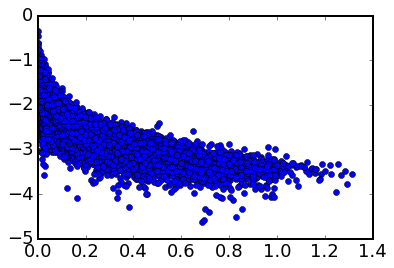

In [42]:
plt.plot(r,lognelec,'o')
plt.show()